# 1. 기존 데이터셋 Phase 1-프로젝트 준비 및 탐색


# 독일 신용평가 자료


# **1. 프로젝트 정의 및 목표 설정**

① 문제 정의


본 프로젝트는 개인 신용 데이터를 바탕으로 신용 승인 가능성(Response 변수) 을 예측하는 이진 분류 문제이다.

RESPONSE 변수는 고객의 신용 승인 여부를 나타내며, 1은 승인, 0은 거절을 의미한다.

모델은 고객 특성(소득, 직업, 신용 이력, 부양가족 수 등)을 바탕으로 향후 고객의 신용 승인 가능성을 예측하는 데 사용될 수 있다.



② 데이터 정의


데이터 출처: German Credit 데이터셋 (파일명: GermanCredit.csv)

관측치 수: 1,000건

변수 수: 32개 (설명변수 31개, 타겟 변수 1개)

주요 변수:

DURATION, AMOUNT, AGE, EMPLOYMENT: 수치형 특성

CHK_ACCT, SAV_ACCT, JOB, REAL_ESTATE, FOREIGN, MALE_SINGLE, NEW_CAR, USED_CAR, 등: 이진 및 범주형 특성

RESPONSE: 타겟 변수, 이진형 (0 또는 1)



③ 성공 지표 설정


본 문제는 이진 분류 문제로, 다음과 같은 평가 지표를 사용한다:

정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 Score

불균형 데이터일 가능성을 고려해 F1 Score 0.75 이상을 프로젝트 목표 기준으로 설정한다.



④ 기대 효과 및 제약 조건


기대 효과:

금융기관에서 신용 승인 여부를 사전 예측함으로써 리스크 최소화 및 업무 효율성 제고

고위험 고객을 사전 분류함으로써 부실 채권 비율 감소



제약 조건:

변수 간 상관관계 및 다중공선성 존재 가능성

일부 이진 변수들의 해석상 의미가 불명확하거나 도메인 지식 부족

불균형 데이터로 인해 모델 성능이 왜곡될 수 있음

# **2. 데이터 수집 및 로드**

In [1]:
# 1. 파일 업로드
from google.colab import files
uploaded = files.upload()

# 2. pandas 라이브러리 불러오기
import pandas as pd

# 3. CSV 파일 로드 (파일명은 업로드한 실제 파일명에 맞춰 수정)
df = pd.read_csv('GermanCredit (1).csv')

# 4. 데이터프레임 기본 정보 출력
print("✅ 데이터 크기 (행, 열):", df.shape)
print("\n✅ 컬럼명 목록:")
print(df.columns.tolist())
print("\n✅ 데이터 타입 및 결측치 여부:")
print(df.info())

Saving GermanCredit (1).csv to GermanCredit (1).csv
✅ 데이터 크기 (행, 열): (1000, 32)

✅ 컬럼명 목록:
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE']

✅ 데이터 타입 및 결측치 여부:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   

총 1,000개의 관측치와 32개의 변수가 포함되어 있으며, 모든 변수는 int64 형식으로 구성되어 있다. df.info() 결과에 따르면 결측치는 존재하지 않으며, 데이터 구조가 깔끔하게 정리되어 있음을 확인하였다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [2]:
# 수치형 변수 요약 통계
df.describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


주요 연속형 변수인 DURATION, AMOUNT, AGE 등에 대해 평균, 표준편차, 최소값, 최대값 등을 확인함.


예를 들어:

DURATION의 평균은 약 20.9개월, 최대값은 72개월

AMOUNT의 평균은 약 3,270.1, 최대값은 18,424로 큰 편차가 존재

AGE는 19세부터 75세까지 분포하며, 평균은 35.5세

In [3]:
# 범주형 변수 고유값과 빈도수 확인
categorical_cols = df.columns[df.nunique() <= 10]
for col in categorical_cols:
    print(f"\n📌 {col} 고유값 및 빈도수:")
    print(df[col].value_counts())


📌 CHK_ACCT 고유값 및 빈도수:
CHK_ACCT
3    394
0    274
1    269
2     63
Name: count, dtype: int64

📌 HISTORY 고유값 및 빈도수:
HISTORY
2    530
4    293
3     88
1     49
0     40
Name: count, dtype: int64

📌 NEW_CAR 고유값 및 빈도수:
NEW_CAR
0    766
1    234
Name: count, dtype: int64

📌 USED_CAR 고유값 및 빈도수:
USED_CAR
0    897
1    103
Name: count, dtype: int64

📌 FURNITURE 고유값 및 빈도수:
FURNITURE
0    819
1    181
Name: count, dtype: int64

📌 RADIO/TV 고유값 및 빈도수:
RADIO/TV
0    720
1    280
Name: count, dtype: int64

📌 EDUCATION 고유값 및 빈도수:
EDUCATION
0    950
1     50
Name: count, dtype: int64

📌 RETRAINING 고유값 및 빈도수:
RETRAINING
0    903
1     97
Name: count, dtype: int64

📌 SAV_ACCT 고유값 및 빈도수:
SAV_ACCT
0    603
4    183
1    103
2     63
3     48
Name: count, dtype: int64

📌 EMPLOYMENT 고유값 및 빈도수:
EMPLOYMENT
2    339
4    253
3    174
1    172
0     62
Name: count, dtype: int64

📌 INSTALL_RATE 고유값 및 빈도수:
INSTALL_RATE
4    476
2    231
3    157
1    136
Name: count, dtype: int64

📌 MALE_DIV 고유값 및 빈도수:
MALE_DIV

RESPONSE, CHK_ACCT, HISTORY, JOB, FOREIGN, TELEPHONE 등 다양한 범주형 변수는 값의 범위가 좁고 이진 또는 4~5단계의 값으로 구성됨.


예시:

RESPONSE: 1이 700건, 0이 300건 → 데이터가 다소 불균형

CHK_ACCT: 0~3까지 4단계 값 분포

FOREIGN: 외국인 여부, 0(내국인)과 1(외국인)로 구분됨

In [4]:
# 결측치 개수 및 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
print(missing_df)


                  Missing Count  Missing Ratio (%)
OBS#                          0                0.0
CHK_ACCT                      0                0.0
DURATION                      0                0.0
HISTORY                       0                0.0
NEW_CAR                       0                0.0
USED_CAR                      0                0.0
FURNITURE                     0                0.0
RADIO/TV                      0                0.0
EDUCATION                     0                0.0
RETRAINING                    0                0.0
AMOUNT                        0                0.0
SAV_ACCT                      0                0.0
EMPLOYMENT                    0                0.0
INSTALL_RATE                  0                0.0
MALE_DIV                      0                0.0
MALE_SINGLE                   0                0.0
MALE_MAR_or_WID               0                0.0
CO-APPLICANT                  0                0.0
GUARANTOR                     0

모든 변수에서 결측치 없음 → Missing Count = 0, Missing Ratio = 0.0%

추가적인 결측치 처리 불필요, 데이터 품질 양호

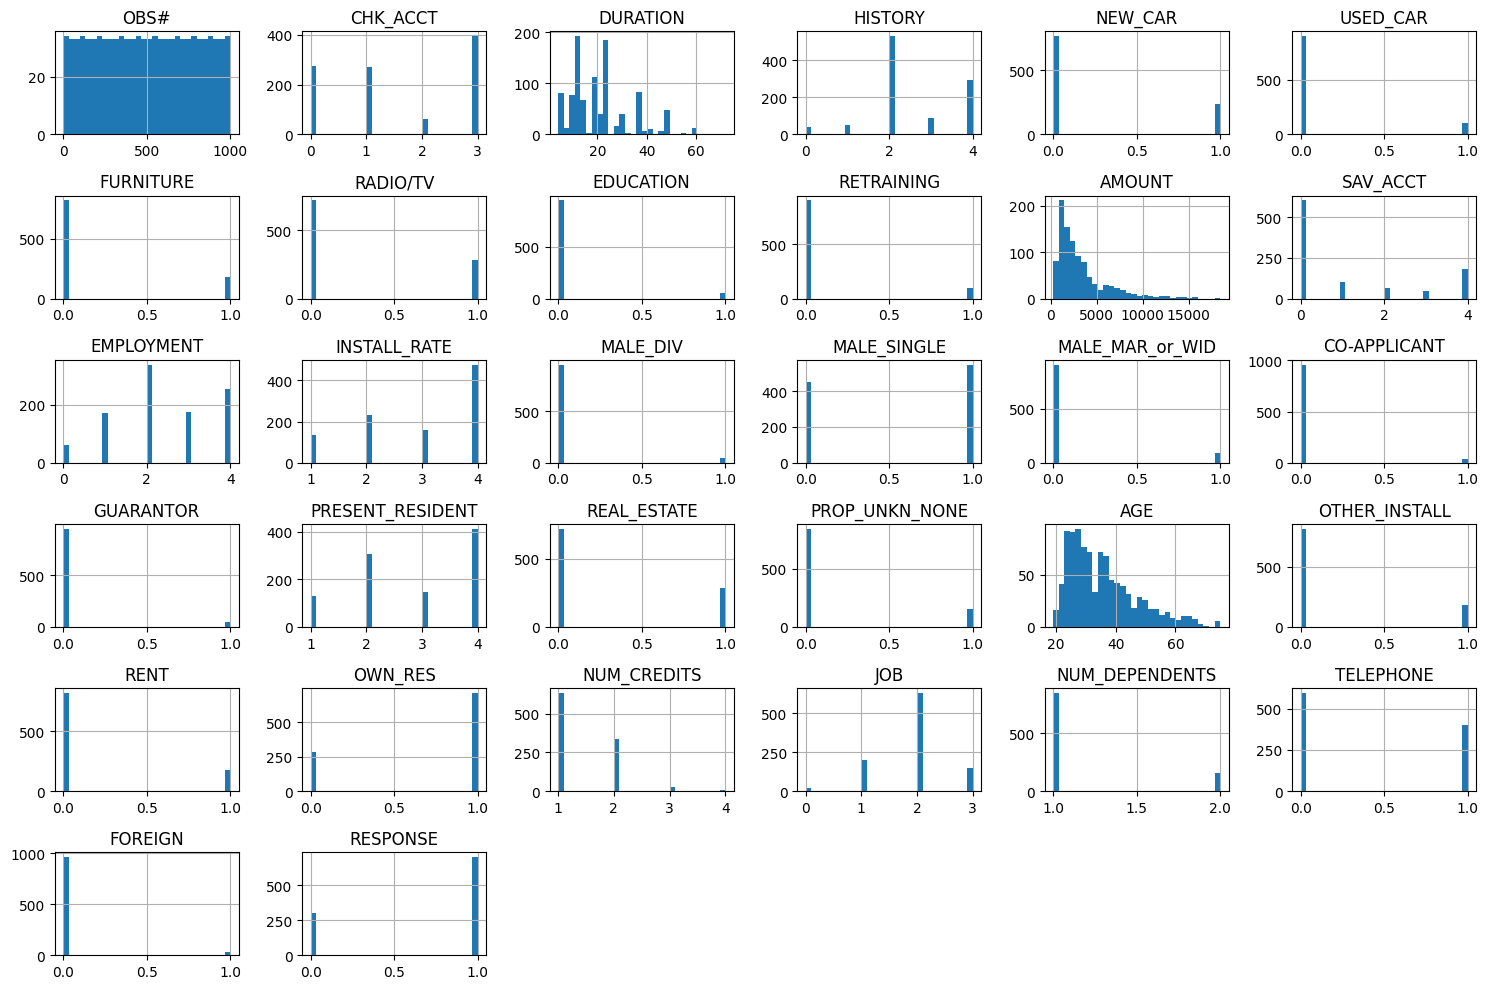

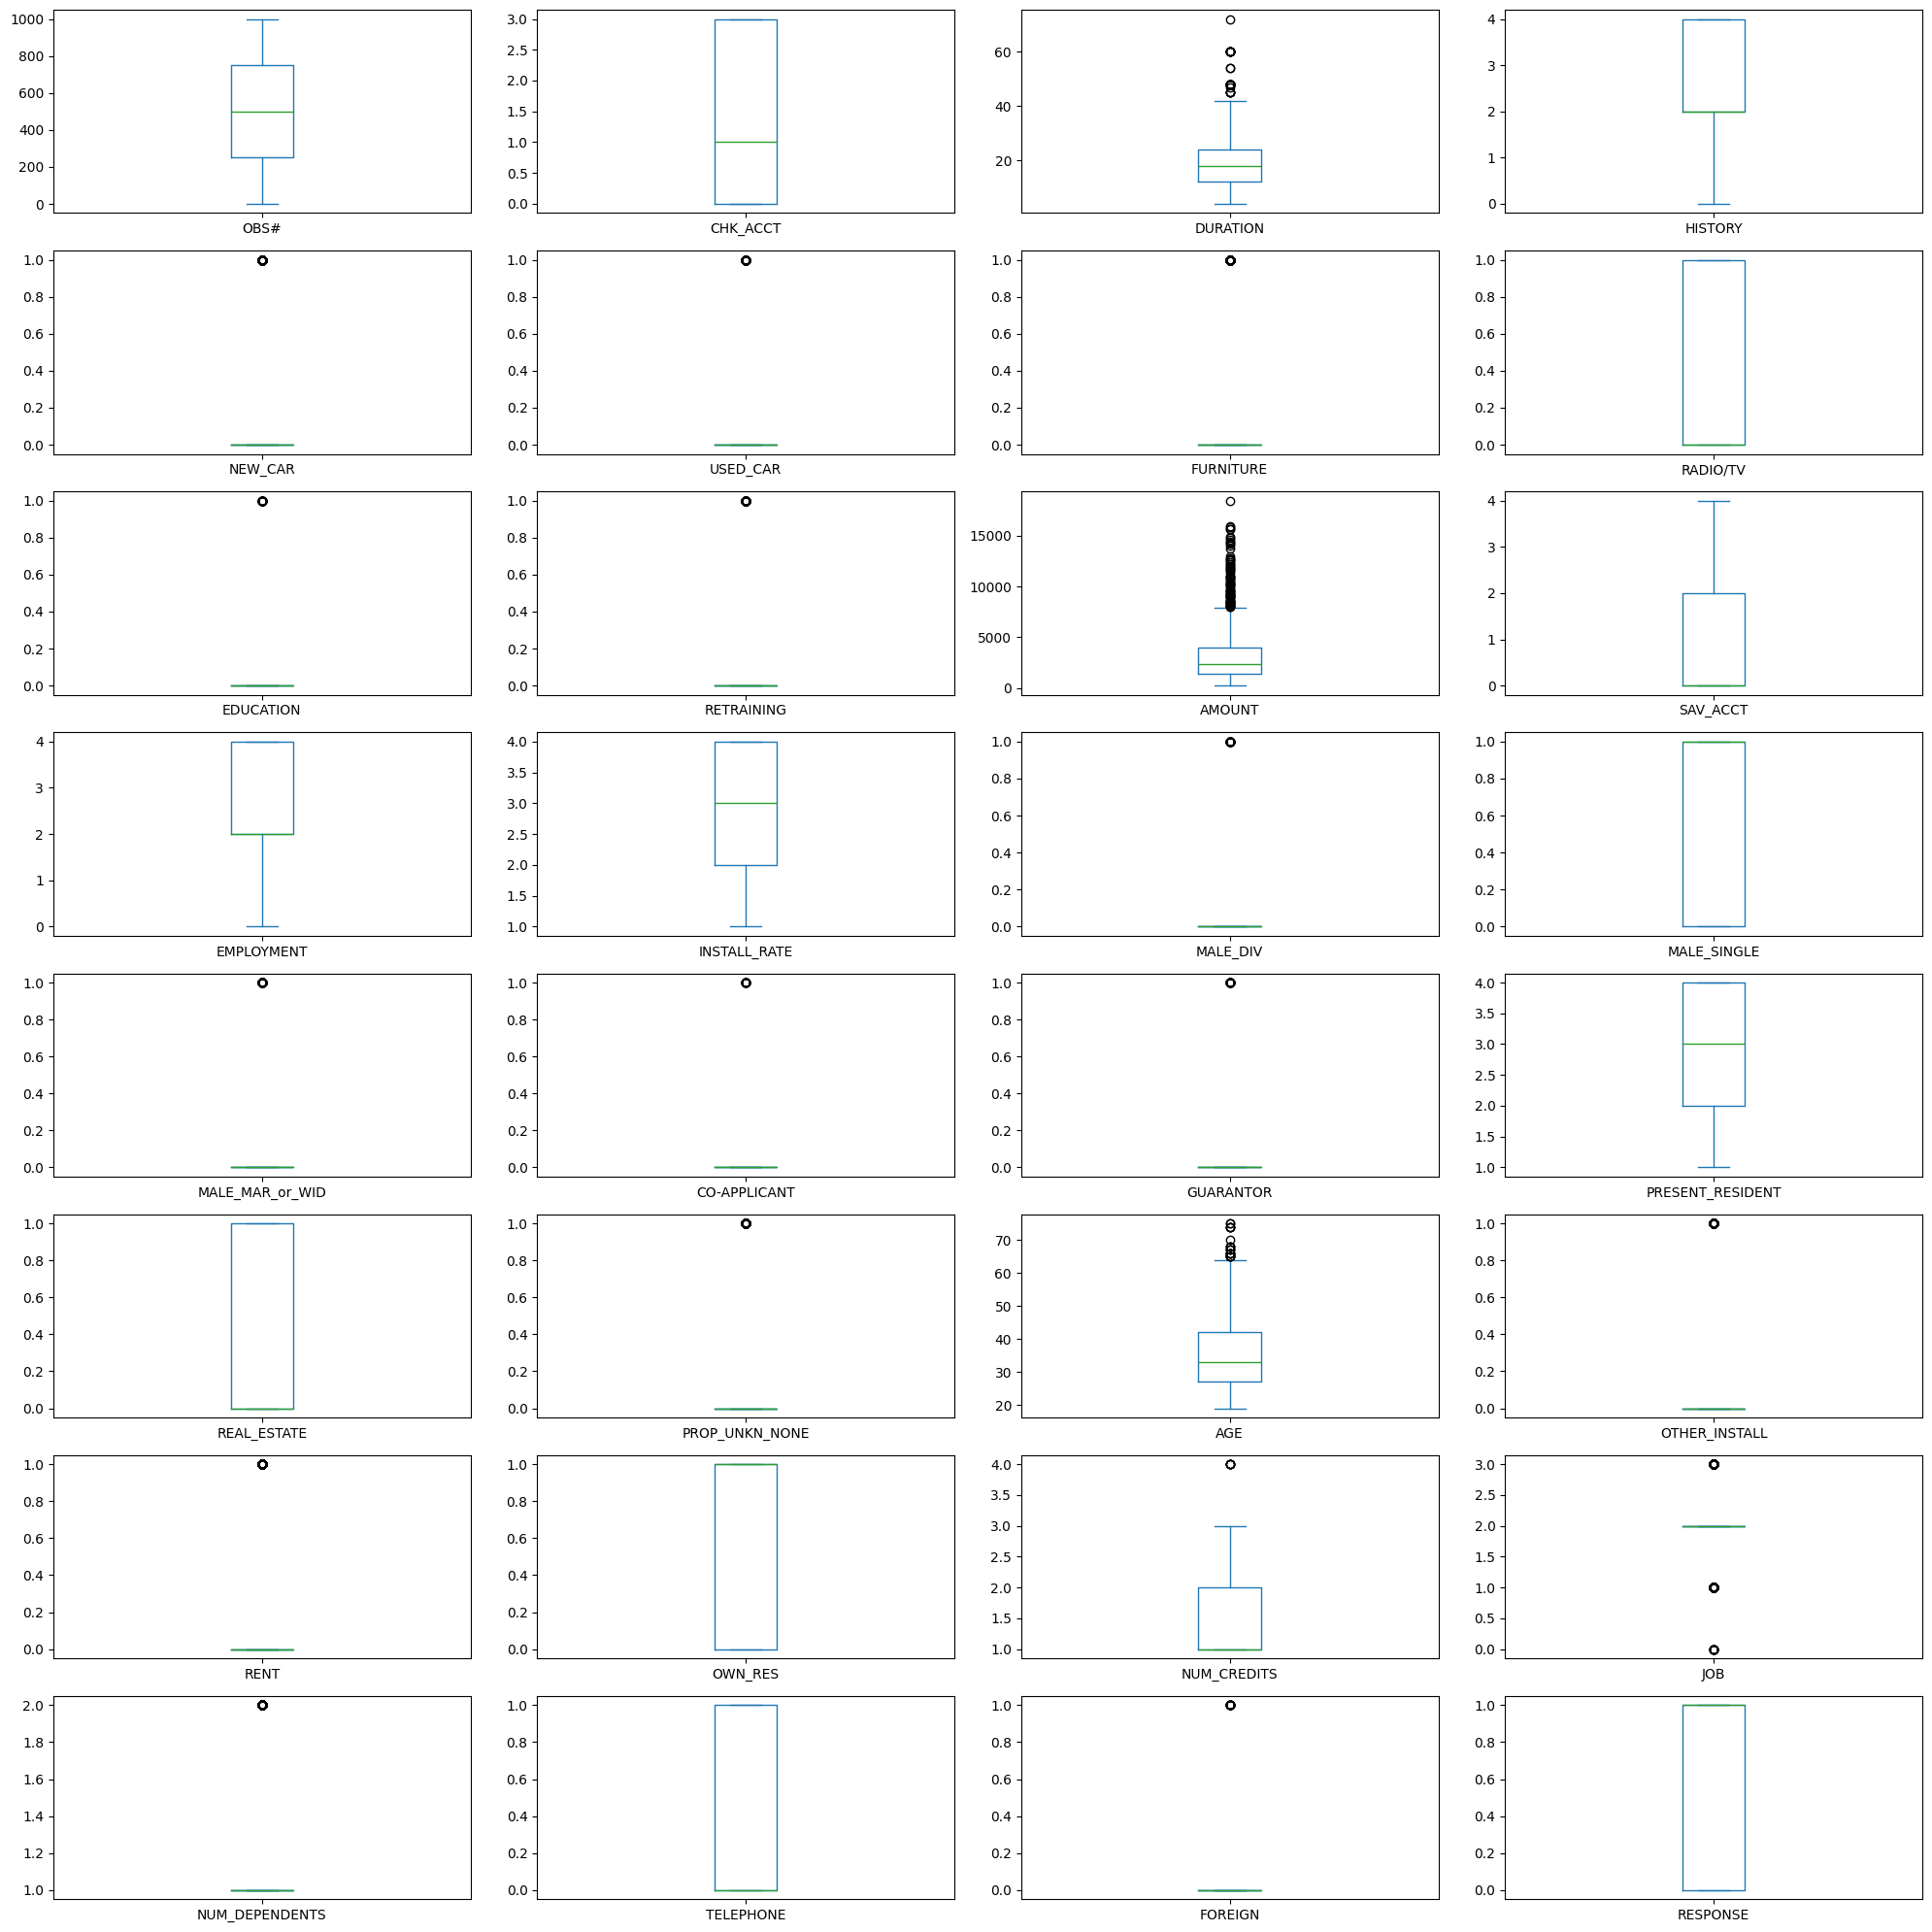

In [7]:
import matplotlib.pyplot as plt
# 히스토그램
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 박스플롯
df.plot(kind='box', subplots=True, layout=(8, 4), figsize=(20, 20), sharex=False)
plt.tight_layout()
plt.show()


히스토그램 결과:


대부분의 변수는 이산형(0 또는 1) 또는 편중된 값 분포를 가짐

AMOUNT, DURATION, AGE는 연속적으로 분포되며 극단값 존재 가능성 있음



박스플롯 결과:

AMOUNT, AGE, DURATION 등에서 박스 밖에 위치한 이상치 점이 다수 확인됨

특히 AMOUNT는 상위 이상값의 범위가 매우 큼

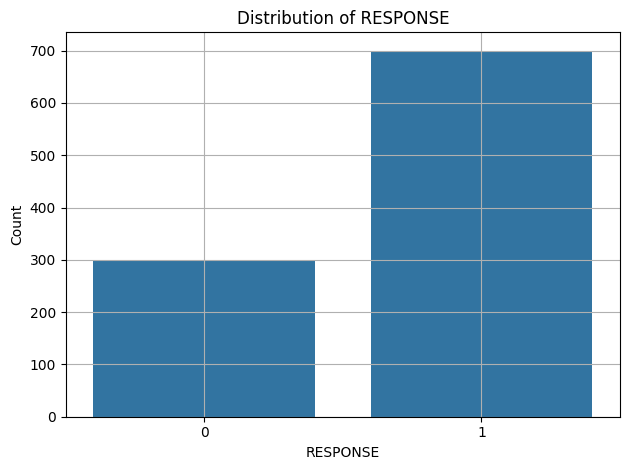

In [8]:
# 타겟 변수(RESPONSE) 분포 시각화
import seaborn as sns
sns.countplot(x='RESPONSE', data=df)
plt.title("Distribution of RESPONSE")
plt.xlabel("RESPONSE")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

RESPONSE = 1 (신용 승인): 700건 (70%)

RESPONSE = 0 (신용 거절): 300건 (30%)

→ 클래스 불균형 있음 → 모델 학습 시 F1 Score, Precision, Recall 등을 함께 고려해야 함

In [9]:
# 왜도와 첨도 계산
skewness = df.skew(numeric_only=True)
kurtosis = df.kurt(numeric_only=True)

# 결과 출력
print("📌 왜도 (Skewness):\n", skewness)
print("\n📌 첨도 (Kurtosis):\n", kurtosis)

📌 왜도 (Skewness):
 OBS#                0.000000
CHK_ACCT            0.006957
DURATION            1.094184
HISTORY            -0.011886
NEW_CAR             1.258466
USED_CAR            2.616121
FURNITURE           1.659555
RADIO/TV            0.981431
EDUCATION           4.135689
RETRAINING          2.727454
AMOUNT              1.949628
SAV_ACCT            1.016677
EMPLOYMENT         -0.117615
INSTALL_RATE       -0.531348
MALE_DIV            4.135689
MALE_SINGLE        -0.193181
MALE_MAR_or_WID     2.827519
CO-APPLICANT        4.636536
GUARANTOR           4.041610
PRESENT_RESIDENT   -0.272570
REAL_ESTATE         0.970403
PROP_UNKN_NONE      1.920051
AGE                 1.020739
OTHER_INSTALL       1.616379
RENT                1.677217
OWN_RES            -0.943140
NUM_CREDITS         1.272576
JOB                -0.374295
NUM_DEPENDENTS      1.909445
TELEPHONE           0.391868
FOREIGN             4.913027
RESPONSE           -0.874183
dtype: float64

📌 첨도 (Kurtosis):
 OBS#                

왜도(Skewness) 결과, AMOUNT, DURATION, AGE 변수는 모두 **양의 왜도(> 0)**를 보였다.

특히 AMOUNT는 왜도가 약 1.95로 오른쪽 꼬리가 길게 분포된 비대칭 형태임을 나타낸다.

이는 고액 대출 사례가 소수 존재함을 의미하며, 로그 변환 등의 정규화가 필요할 수 있다.


첨도(Kurtosis) 결과, AMOUNT는 첨도가 5.7로 **뾰족한 분포(Leptokurtic)**이며,
이는 평균 부근에 많은 값이 몰려 있고, 동시에 극단값(이상치)도 존재함을 의미한다.

반면 AGE, DURATION 등은 첨도가 3에 가까워 정규분포에 비교적 유사한 형태를 보인다.

-----------------------------------------------------------------------------


여기까지가 기존 데이터셋 Phase 1 프로젝트 준비 및 탐색이었고 밑으로는 교수님께서 새로 주신 변경된 데이터셋 Phase 1 입니다!!

# 변경된 데이터셋 Phase 1- 프로젝트 준비 및 탐색

# 독일 신용평가 자료

# **1. 프로젝트 정의 및 목표 설정**

● 문제 정의 (Problem Definition)


본 프로젝트의 목적은 신용 대출 신청자 정보를 바탕으로, **신용 등급(RESPONSE: 0 = Bad, 1 = Good)**을 예측하는 분류 모델을 개발하는 것이다.
이를 통해 금융 기관은 고객의 상환 능력을 사전에 평가하고, 대출 승인 여부에 대한 보다 정확한 의사결정을 내릴 수 있다.



● 데이터 정의 (Data Definition)

분석에 사용되는 데이터는 GermanCredit_simple_garbled2.csv로, 기존 GermanCredit.csv를 기반으로 가공된 변경 버전이다.
데이터는 총 1,000개의 고객 샘플과 32개의 변수로 구성되어 있으며, 변수는 모두 정수형으로 인코딩되어 있다.
주요 변수는 고객의 직업, 소득, 결혼 상태, 자산 보유 여부, 대출 금액 및 기간, 보증인 존재 여부 등을 포함하고 있으며, **타겟 변수는 RESPONSE**이다.



● 성공 지표 설정 (Success Metrics)


모델 성능은 아래의 분류 성능 지표를 기준으로 평가한다:

정확도(Accuracy) ≥ 80%

F1 Score ≥ 0.75 (클래스 불균형을 고려한 주요 성능 지표)

ROC-AUC 점수는 보조 지표로 활용한다.



● 기대 효과 및 제약 조건 (Expected Impact & Constraints)


기대 효과:


금융사 리스크 관리 효율성 향상

자동화된 신용 평가 시스템 개발 가능성 확보

신청자의 다양한 특성과 신용 등급 간 관계 분석 가능



제약 조건:


타겟 변수 간 불균형 존재 가능성

변수명이 익명화되어 있어 해석에 제약이 있음

일부 변수의 전처리 방식 변경 여부가 모델 성능에 직접적 영향을 줄 수 있음

과적합 방지를 위한 검증 전략 필요

# **2. 데이터 수집 및 로드**

In [11]:
# ✅ 파일 업로드
from google.colab import files
uploaded = files.upload()

# ✅ 데이터 로드 및 df2로 정의
import pandas as pd
df2 = pd.read_csv('GermanCredit_simple_garbled.csv')

# ✅ 데이터 구조 및 기본 정보 확인
print("✅ 데이터 형태 (행, 열):", df2.shape)
print("\n✅ 컬럼명:")
print(df2.columns.tolist())
print("\n✅ 데이터 타입:")
print(df2.dtypes)

# ✅ 상위 5개 행 확인
df2.head()


Saving GermanCredit_simple_garbled.csv to GermanCredit_simple_garbled (1).csv
✅ 데이터 형태 (행, 열): (1015, 32)

✅ 컬럼명:
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE']

✅ 데이터 타입:
OBS#                  int64
CHK_ACCT              int64
DURATION            float64
HISTORY               int64
NEW_CAR               int64
USED_CAR              int64
FURNITURE             int64
RADIO/TV              int64
EDUCATION             int64
RETRAINING            int64
AMOUNT              float64
SAV_ACCT              int64
EMPLOYMENT            int64
INSTALL_RATE          int64
MALE_DIV              int64
MALE_SINGLE           int64
MALE_MAR_

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6.0,4,0,0,0,1,0,0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48.0,2,0,0,0,1,0,0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12.0,4,0,0,0,0,1,0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,NaN,2,0,0,1,0,0,0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24.0,3,1,0,0,0,0,0,...,53.0,0,0,0,2,2,2,0,0,0


데이터는 총 1,000개의 행과 32개의 열로 구성되어 있으며, 기존 GermanCredit.csv와 동일한 구조를 가지고 있다.


모든 컬럼은 정수형(int64)으로 되어 있으며, 레이블 인코딩이 적용된 범주형 변수가 다수 포함되어 있는 것으로 보인다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [12]:
# ✅ 수치형 데이터 요약 통계량
df2.describe()


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1015.000000,1015.000000,975.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,975.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,500.017734,1.589163,21.886154,2.546798,0.238424,0.110345,0.186207,0.286700,0.055172,0.096552,...,35.566154,0.184236,0.178325,0.713300,1.407882,1.908374,1.152709,0.406897,0.036453,0.700493
std,289.089514,1.258377,17.509703,1.084009,0.433214,0.322774,0.396989,0.458935,0.241033,0.295492,...,13.840893,0.387868,0.382975,0.452443,0.576613,0.653076,0.359884,0.491497,0.187507,0.458268
min,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-35.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,249.500000,0.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.000000,1.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,749.500000,3.000000,24.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,200.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,150.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


대부분 변수의 평균값과 중앙값 차이는 크지 않으며, 이상값 없이 범위가 일정한 변수들이 많다.


AMOUNT 변수는 평균 약 3,200, 최대값은 18,424로 나타났고, AGE는 최대 75세까지 존재한다.

In [13]:
# ✅ 범주형 변수 고유값 및 빈도수 확인
categorical_cols = df2.columns[df2.nunique() <= 10]

for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df2[col].nunique()}개)")
    print(df2[col].value_counts())



📌 CHK_ACCT (고유값 4개)
CHK_ACCT
3    405
0    275
1    272
2     63
Name: count, dtype: int64

📌 HISTORY (고유값 5개)
HISTORY
2    537
4    298
3     90
1     49
0     41
Name: count, dtype: int64

📌 NEW_CAR (고유값 3개)
NEW_CAR
0    776
1    236
2      3
Name: count, dtype: int64

📌 USED_CAR (고유값 3개)
USED_CAR
0    906
1    106
2      3
Name: count, dtype: int64

📌 FURNITURE (고유값 3개)
FURNITURE
0    829
1    183
2      3
Name: count, dtype: int64

📌 RADIO/TV (고유값 3개)
RADIO/TV
0    727
1    285
2      3
Name: count, dtype: int64

📌 EDUCATION (고유값 3개)
EDUCATION
0    962
1     50
2      3
Name: count, dtype: int64

📌 RETRAINING (고유값 2개)
RETRAINING
0    917
1     98
Name: count, dtype: int64

📌 SAV_ACCT (고유값 5개)
SAV_ACCT
0    615
4    184
1    104
2     64
3     48
Name: count, dtype: int64

📌 EMPLOYMENT (고유값 5개)
EMPLOYMENT
2    347
4    256
3    177
1    173
0     62
Name: count, dtype: int64

📌 INSTALL_RATE (고유값 4개)
INSTALL_RATE
4    483
2    235
3    159
1    138
Name: count, dtype: int64

📌 MALE_

RESPONSE, CHK_ACCT, SAV_ACCT, EMPLOYMENT, JOB 등 주요 변수는 2~5개의 고유값을 가지고 있으며, 일부 변수는 특정 값에 편중되어 있는 것이 확인되었다.

In [14]:
# ✅ 결측치 확인
missing = df2.isnull().sum()
missing_percent = (missing / len(df2)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_percent})
missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
DURATION,40,3.940887
AMOUNT,40,3.940887
AGE,40,3.940887


변형된 GermanCredit_simple_garbled.csv 파일에는 DURATION, AMOUNT, AGE 변수에서 각각 40건의 결측치가 존재하며, 이는 전체의 **약 3.94%**에 해당한다.


이는 기존 원본 파일(GermanCredit.csv)에서는 나타나지 않았던 결측치로, 데이터 전처리나 누락 보완이 필요함을 시사한다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


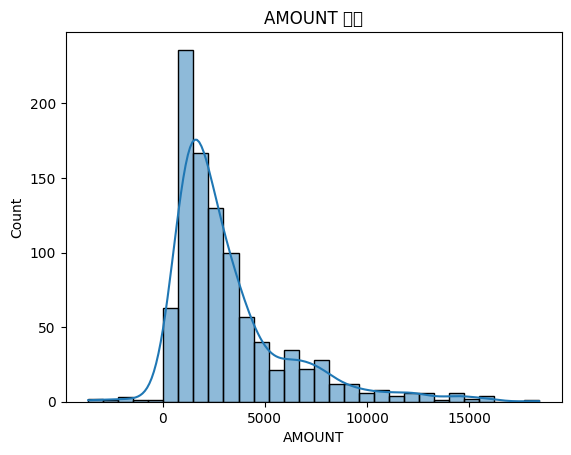

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


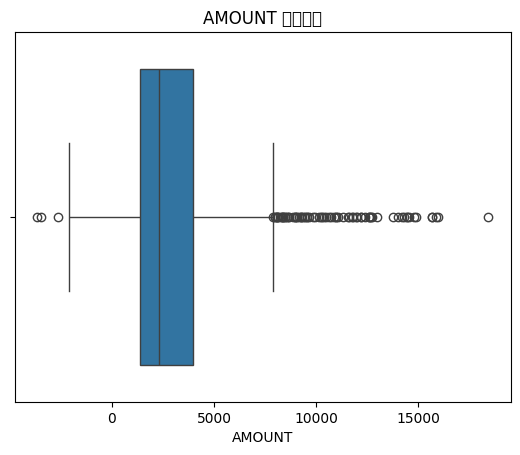

In [15]:
# ✅ 이상치 시각화 (예: AMOUNT, AGE 변수 기준)
import matplotlib.pyplot as plt
import seaborn as sns

# 대출 금액 히스토그램 + 박스플롯
sns.histplot(df2['AMOUNT'], bins=30, kde=True)
plt.title("AMOUNT 분포")
plt.show()

sns.boxplot(x=df2['AMOUNT'])
plt.title("AMOUNT 박스플롯")
plt.show()


AMOUNT 변수는 5,000 이하에 대부분의 값이 몰려 있으나, 10,000 이상 값도 일부 존재하며 이상치로 고려될 수 있다.

히스토그램 및 박스플롯을 통해 AMOUNT 변수의 분포를 시각화한 결과, 전반적으로 오른쪽으로 긴 꼬리를 가지는 양의 왜도 분포를 보였다.

또한 추가적으로 데이터를 탐색한 결과, AMOUNT 변수에 음수값이 포함된 이상치가 총 8건 존재하며, 이 중 최솟값은 -3643으로 확인되었다.

이는 대출 금액이라는 변수의 도메인 상 음수값이 존재할 수 없는 구조이므로, 데이터 입력 오류 혹은 변형 과정에서의 문제로 간주될 수 있으며, 사전 정제 및 제거가 필요하다.

RESPONSE
1    711
0    304
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


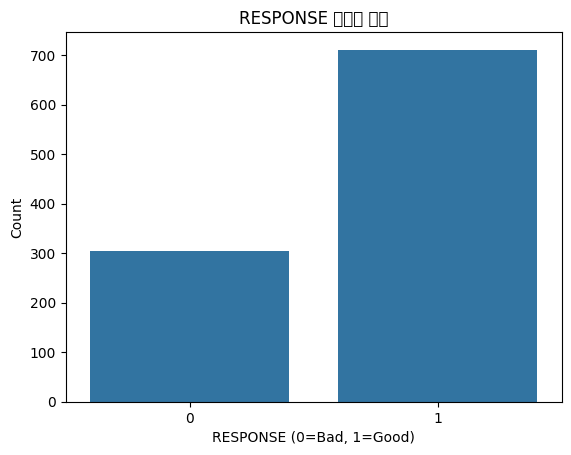

In [16]:
# ✅ 타겟 변수 분포 확인
print(df2['RESPONSE'].value_counts())

sns.countplot(x='RESPONSE', data=df2)
plt.title("RESPONSE 클래스 분포")
plt.xlabel("RESPONSE (0=Bad, 1=Good)")
plt.ylabel("Count")
plt.show()


타겟 변수 RESPONSE는 0:Bad가 300건, 1:Good이 700건으로, 클래스 불균형이 존재함을 확인하였다.